In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

In [2]:
t_epochs = [50]*5 + [100] * 5 + [200] * 5 + [400]*5
epochs = t_epochs*3
api = ['old']* 20 + ['new_layers'] * 20 + ['new_fast_layers']* 20


In [3]:
master = np.concatenate([np.load('A_master_scvi_{}_epochs_cpu.npy'.format(i)) for i in [50,100,200,400]])
refactor_layers = np.concatenate([np.load('A_refactor_scvi_{}_epochs_cpu_layers.npy'.format(i)) for i in [50,100,200,400]])
refactor_underscore_layers = np.concatenate([np.load('A_refactor_scvi_{}_epochs_cpu_underscore_layers.npy'.format(i)) for i in [50,100,200,400]])

In [4]:
data = np.concatenate((master, refactor_layers,refactor_underscore_layers))
df = pd.DataFrame(data = np.stack((data, epochs,api), axis = 1), 
                  columns = ['time', 'n_epochs', 'api'])
df['time'] = df['time'].astype(float)


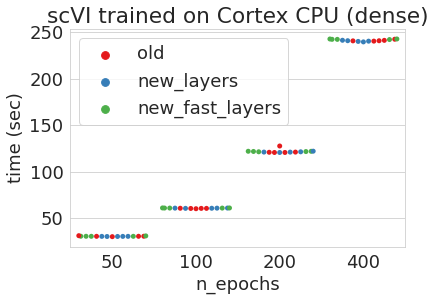

In [5]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.swarmplot(x="n_epochs", y="time", order = ['50','100','200','400'],hue="api",data=df, palette="Set1",color=".2")
plt.legend(loc='upper left')

ax.set_title('scVI trained on Cortex CPU (dense)')
ax.set_ylabel('time (sec)')
ax.figure.savefig('scvi_cortex_cpu_dense_layers.png',bbox_inches='tight')

In [6]:
master = np.concatenate([np.load('A_master_scvi_{}_epochs_cpu_sparse.npy'.format(i)) for i in [50,100,200,400]])
refactor_layers = np.concatenate([np.load('A_refactor_scvi_{}_epochs_cpu_layers_sparse.npy'.format(i)) for i in [50,100,200,400]])
refactor_underscore_layers = np.concatenate([np.load('A_refactor_scvi_{}_epochs_cpu_underscore_layers_sparse.npy'.format(i)) for i in [50,100,200,400]])

In [7]:
data = np.concatenate((master, refactor_layers,refactor_underscore_layers))
df = pd.DataFrame(data = np.stack((data, epochs,api), axis = 1), 
                  columns = ['time', 'n_epochs', 'api'])
df['time'] = df['time'].astype(float)


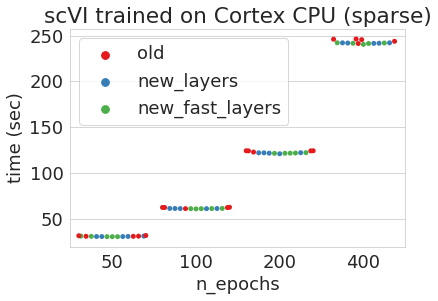

In [8]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.swarmplot(x="n_epochs", y="time", order = ['50','100','200','400'],hue="api",data=df, palette="Set1",color=".2")
plt.legend(loc='upper left')

ax.set_title('scVI trained on Cortex CPU (sparse)')
ax.set_ylabel('time (sec)')
ax.figure.savefig('scvi_cortex_cpu_sparse_layers.png',bbox_inches='tight')

In [9]:
master = np.concatenate([np.load('A_master_scvi_{}_epochs_cpu.npy'.format(i)) for i in [50,100,200,400]])
refactor_X= np.concatenate([np.load('A_refactor_scvi_{}_epochs_cpu_X.npy'.format(i)) for i in [50,100,200,400]])

t_epochs = [50]*5 + [100] * 5 + [200] * 5 + [400]*5
epochs = t_epochs*2
api = ['old']* 20 + ['new_X'] * 20

data = np.concatenate((master, refactor_X))
df = pd.DataFrame(data = np.stack((data, epochs,api), axis = 1), 
                  columns = ['time', 'n_epochs', 'api'])
df['time'] = df['time'].astype(float)


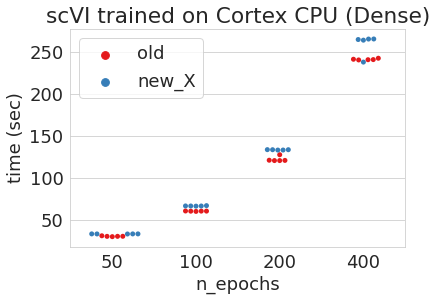

In [10]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.swarmplot(x="n_epochs", y="time", order = ['50','100','200','400'],hue="api",data=df, palette="Set1",color=".2")
plt.legend(loc='upper left')

ax.set_title('scVI trained on Cortex CPU (Dense)')
ax.set_ylabel('time (sec)')
ax.figure.savefig('scvi_cortex_cpu_dense_X',bbox_inches='tight')

In [11]:
master = np.concatenate([np.load('A_master_scvi_{}_epochs_cpu_sparse.npy'.format(i)) for i in [50,100,200,400]])
refactor_X= np.concatenate([np.load('A_refactor_scvi_{}_epochs_cpu_X_sparse.npy'.format(i)) for i in [50,100,200,400]])

t_epochs = [50]*5 + [100] * 5 + [200] * 5 + [400]*5
epochs = t_epochs*2
api = ['old']* 20 + ['new_X'] * 20

data = np.concatenate((master, refactor_X))
df = pd.DataFrame(data = np.stack((data, epochs,api), axis = 1), 
                  columns = ['time', 'n_epochs', 'api'])
df['time'] = df['time'].astype(float)


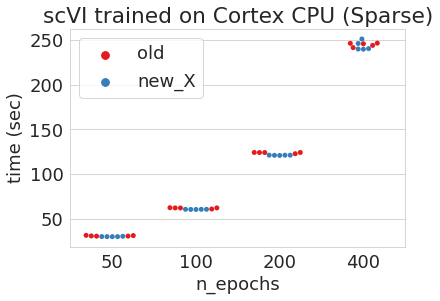

In [12]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.swarmplot(x="n_epochs", y="time", order = ['50','100','200','400'],hue="api",data=df, palette="Set1",color=".2")
plt.legend(loc='upper left')

ax.set_title('scVI trained on Cortex CPU (Sparse)')
ax.set_ylabel('time (sec)')
ax.figure.savefig('scvi_cortex_cpu_sparse_X',bbox_inches='tight')

In [13]:
o_50 = np.load('master_totalvi_50_epochs.npy')
o_100 = np.load('master_totalvi_100_epochs.npy')
o_200 = np.load('master_totalvi_200_epochs.npy')

n_50 = np.load('refactor_totalvi_50_epochs.npy')
n_100 = np.load('refactor_totalvi_100_epochs.npy')
n_200 = np.load('refactor_totalvi_200_epochs_2.npy')

data = np.concatenate([o_50,o_100,o_200,n_50, n_100, n_200 ]).astype(float)
n_epochs = np.stack([50]* len(o_50) + [100] * len(o_100) +
                    [200]*len(o_200)+ [50]* len(n_50) + [100] * len(n_100) +
                    [200]*len(n_200))
api = np.stack(['old'] * (len(o_50) + len(o_100) + len(o_200)) +
               ['new'] * (len(n_50) + len(n_100) + len(n_200)))

o_50 = np.load('master_scvi_50_epochs_cpu.npy')
o_100 = np.load('master_scvi_100_epochs_cpu.npy')
o_200 = np.load('master_scvi_200_epochs_cpu.npy')
o_400 = np.load('master_scvi_400_epochs_cpu.npy')

n_50 = np.load('refactor_scvi_50_epochs_cpu_4_X.npy')
n_100 = np.load('refactor_scvi_100_epochs_cpu_4_X.npy')
n_200 = np.load('refactor_scvi_200_epochs_cpu_4_X.npy')
n_400 = np.load('refactor_scvi_400_epochs_cpu_4_X.npy')

data = np.concatenate([o_50,o_100,o_200, o_400,n_50, n_100, n_200, n_400 ]).astype(float)
n_epochs = np.stack([50]* len(o_50) + [100] * len(o_100) +
                    [200]*len(o_200)+ [400]* len(o_400)+ [50]* len(n_50) + [100] * len(n_100) +
                    [200]*len(n_200) + [400]* len(n_400))
api = np.stack(['old'] * (len(o_50) + len(o_100) + len(o_200) + len(o_400)) +
               ['new'] * (len(n_50) + len(n_100) + len(n_200) + len(n_400)))


In [102]:
import pandas as pd

In [103]:
data.dtype

dtype('float64')

In [104]:
df = pd.DataFrame(data = np.stack([data, n_epochs, api], axis =1),columns =['time', 'n_epochs', 'api'])
df['time'] = df['time'].astype(float)

NameError: name 'o_50' is not defined

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


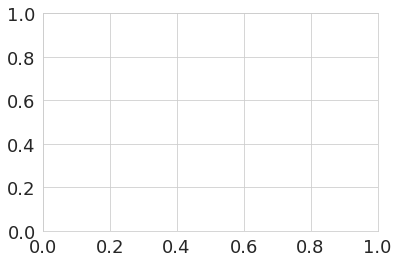

In [13]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([o_50,n_50])
ax.set_title('TotalVI trained on Cortex, 50 epochs, GPU')
ax.set_xlabel('api')
ax.set_ylabel('time (sec)')
plt.xticks([1, 2], ['old', 'new'])

plt.show()


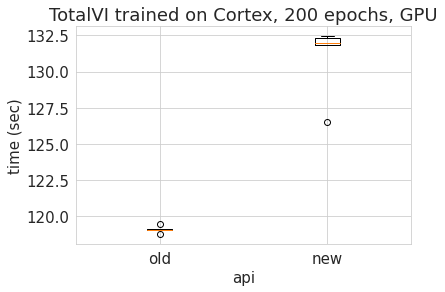

In [107]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([o_200,n_200])
ax.set_title('TotalVI trained on Cortex, 200 epochs, GPU')
ax.set_xlabel('api')
ax.set_ylabel('time (sec)')
plt.xticks([1, 2], ['old', 'new'])

plt.show()
# plt.savefig('exp/cortex_vae_dense_600epochs.png')

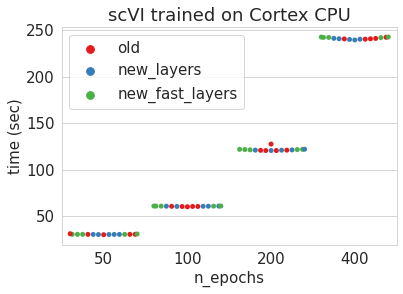

In [100]:
o_200_s = np.load('exp/cortex_sparse_1000genes_200epochs_old.npy')
n_200_s = np.load('exp/cortex_sparse_1000genes_200epochs_refactored.npy')

o_400_s = np.load('exp/cortex_sparse_1000genes_400epochs_old.npy')
n_400_s = np.load('exp/cortex_sparse_1000genes_400epochs_refactored.npy')
data = np.concatenate([o_200_s,n_200_s, o_400_s, n_400_s]).astype(float)
n_epochs = np.stack([200]*30 + [400] * 30)
api = np.stack(['old'] * 15 + ['new']*15 + ['old'] * 15 + ['new']*15)

FileNotFoundError: [Errno 2] No such file or directory: 'exp/cortex_sparse_1000genes_200epochs_old.npy'

In [107]:
df_sparse = pd.DataFrame(data = np.stack([data, n_epochs, api], axis =1),columns =['time', 'n_epochs', 'api'])
df_sparse['time'] = df_sparse['time'].astype(float)

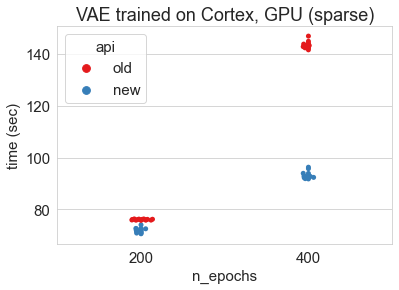

In [109]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.swarmplot(x="n_epochs", y="time", hue="api",data=df_sparse, palette="Set1")

ax.set_title('VAE trained on Cortex, GPU (sparse)')
ax.set_ylabel('time (sec)')
ax.figure.savefig('exp/cortex_vae_sparse_gpu.png')

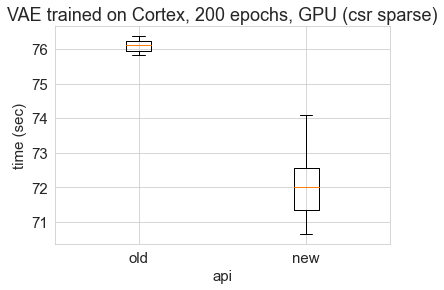

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([o_200_s,n_200_s])
ax.set_title('VAE trained on Cortex, 200 epochs, GPU (csr sparse)')
ax.set_xlabel('api')
ax.set_ylabel('time (sec)')
plt.xticks([1, 2], ['old', 'new'])

plt.show()
